<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Julho_2020_using/blob/master/02_Segmentacao_e_salva_TODAS_calcula_entrada_FotoS_v02_julho_28_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [ ]:
!pip install mahotas

In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
# Segmentation: start here......

In [ ]:
# start top

In [ ]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [ ]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [ ]:
print(img.shape)

(1200, 1200)


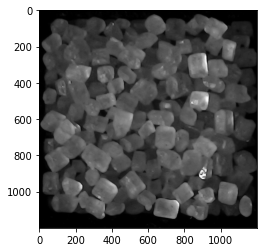

In [ ]:
plt.imshow(img, cmap = "gray")

In [ ]:
#First top

In [ ]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]
SizeWidth=[]  

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
      
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [ ]:
#2nd top

In [ ]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [ ]:
#3th top

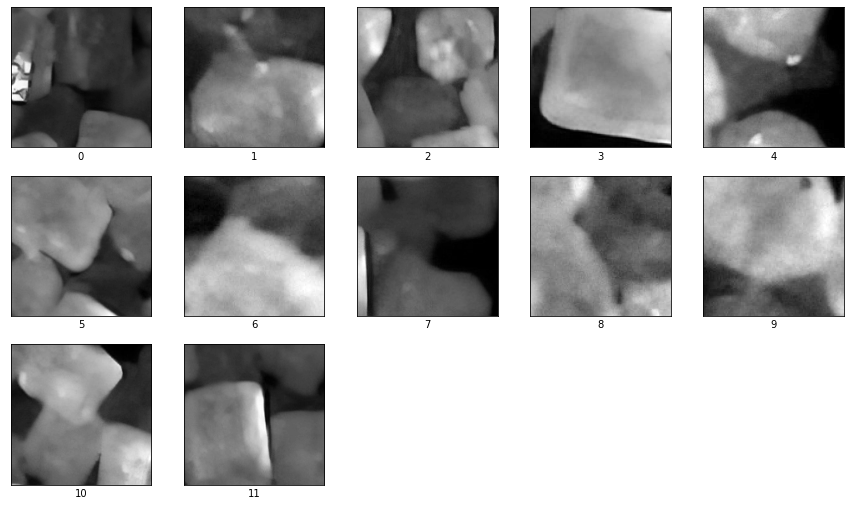

In [ ]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [ ]:
#4th top

In [ ]:
Types_top=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_top.append(Valor)

i= 0 =====
Tipo=V
i= 1 =====
Tipo=V
i= 2 =====
Tipo=V
i= 3 =====
Tipo=V
i= 4 =====
Tipo=V
i= 5 =====
Tipo=V
i= 6 =====
Tipo=V
i= 7 =====
Tipo=V
i= 8 =====
Tipo=V
i= 9 =====
Tipo=
i= 10 =====
Tipo=V
i= 11 =====
Tipo=V


<Figure size 1080x1080 with 0 Axes>

In [ ]:
# 5th top

In [ ]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [ ]:
# 6th top

In [ ]:
img28_top=pd.DataFrame(img28_ravel_all)
img28_top.insert(0,"Type",Types_top)
img28_top.insert(0, "Width", SizeWidth) 

In [ ]:
# Start middle

In [ ]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [ ]:
#First middle

In [ ]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]
SizeWidth=[]  
for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [ ]:
print([i+y,j+x])
print([x,y])
print([Size,Width])

[368, 418]
[248, 198]
[1200, 171]


In [ ]:
print(np.array(img).shape)

(1200, 1200)


In [ ]:
#2nd middle

In [ ]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)

(12, 28, 28)


In [ ]:
#3th middle

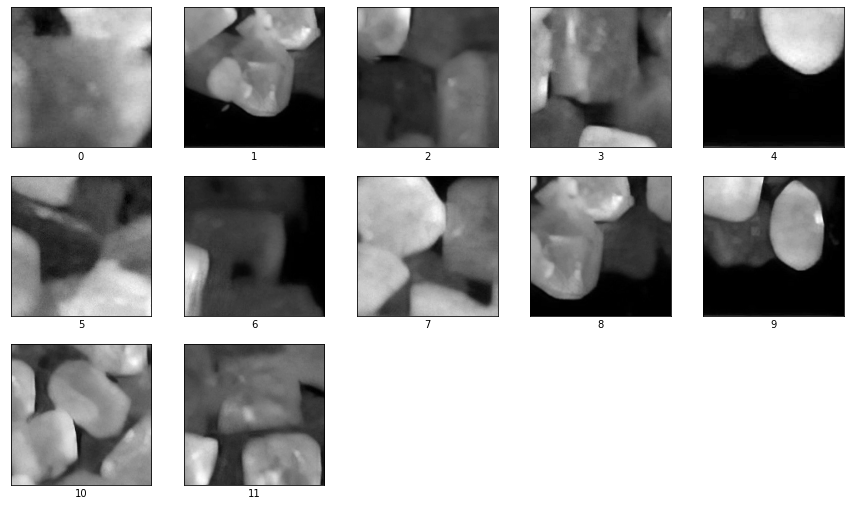

In [ ]:
plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

In [ ]:
#4th middle

In [ ]:
Types_middle=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_middle.append(Valor)

i= 0 =====
Tipo=V
i= 1 =====
Tipo=
i= 2 =====
Tipo=V
i= 3 =====
Tipo=
i= 4 =====
Tipo=
i= 5 =====
Tipo=V
i= 6 =====
Tipo=V
i= 7 =====
Tipo=V
i= 8 =====
Tipo=V
i= 9 =====
Tipo=G
i= 10 =====
Tipo=V
i= 11 =====
Tipo=V


<Figure size 1080x1080 with 0 Axes>

In [ ]:
# 5th middle

In [ ]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [ ]:
# 6th middle

In [ ]:
img28_middle=pd.DataFrame(img28_ravel_all)
img28_middle.insert(0,"Type",Types_middle)
img28_middle.insert(0, "Width", SizeWidth) 

In [ ]:
# start bottom

In [ ]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [ ]:
# First bottom

In [ ]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]
SizeWidth=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [ ]:
# 2nd bottom

In [ ]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)

(12, 28, 28)


In [ ]:
# 3th bottom

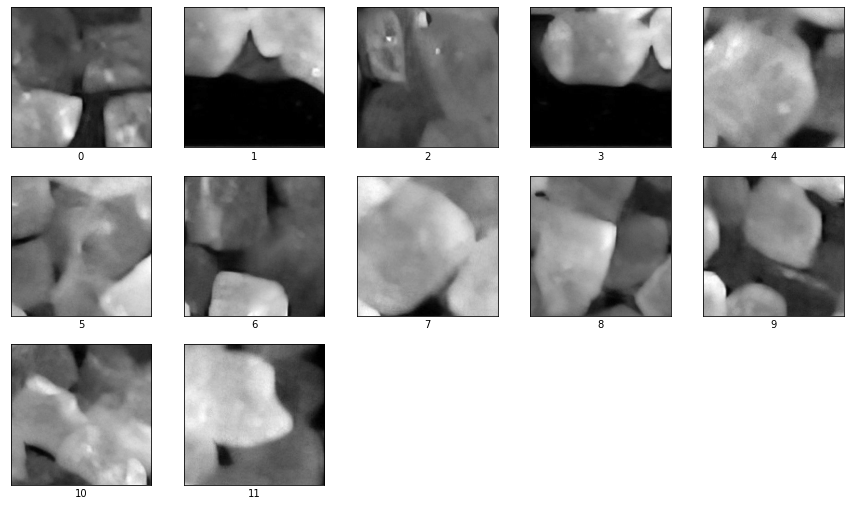

In [ ]:
plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [ ]:
# 4th bottom

In [ ]:
Types_bottom=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_bottom.append(Valor)

i= 0 =====
Tipo=V
i= 1 =====
Tipo=V
i= 2 =====
Tipo=
i= 3 =====
Tipo=V
i= 4 =====
Tipo=V
i= 5 =====
Tipo=V
i= 6 =====
Tipo=V
i= 7 =====
Tipo=V
i= 8 =====
Tipo=V
i= 9 =====
Tipo=G
i= 10 =====
Tipo=V
i= 11 =====
Tipo=V


<Figure size 1080x1080 with 0 Axes>

In [ ]:
# 5th bottom

In [ ]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [ ]:
# 6th bottom

In [ ]:
img28_bottom=pd.DataFrame(img28_ravel_all)
img28_bottom.insert(0,"Type",Types_bottom)
img28_bottom.insert(0, "Width", SizeWidth) 
print(img28_bottom)

    Width Type           0  ...         781         782         783
0     196    V   73.897957  ...  116.428566   99.693878   77.857140
1     169    V   66.088234  ...    6.459613    6.442946    6.356675
2     165        40.395149  ...   80.132820   81.798416   85.741196
3     195    V   52.963848  ...    6.163288    5.634688    5.368073
4     152    V   92.085861  ...   55.445980   74.247223   78.542236
5     175    V   65.806396  ...   99.459190   99.825600   98.507202
6     192    V   51.690968  ...   32.856770   26.437498   16.095486
7     140    V  117.719994  ...  102.239998  106.360001  106.159996
8     193    V  127.200951  ...   96.553360   87.220886   83.130745
9     172    G   86.868042  ...   52.817196   81.826393   92.790695
10    198    V   69.885101  ...  119.329346  102.822250   30.614937
11    151    V   61.951271  ...   38.910225   32.631027   16.460331

[12 rows x 786 columns]


In [ ]:
frames = [img28_top,img28_middle,img28_bottom]
img28_all=pd.concat(frames)
print(img28_all)

    Width Type           0  ...         781         782         783
0     199    V   81.051933  ...  120.739136  119.866112  118.003983
1     131    V   75.186005  ...   93.456497   84.555092   56.826878
2     172    V  119.037865  ...  140.995132  129.528397  110.043808
3     109    V   80.882919  ...   27.429089   41.404259   64.000671
4     143    V   67.903221  ...    1.661793    1.017311    0.787765
5     185    V   99.113731  ...   47.103024   59.878883   71.375809
6     113    V   58.412247  ...  130.950195  133.885971  136.177612
7     139    V   65.671135  ...   43.117798   17.475338    1.000000
8     119    V   65.768166  ...   85.681656   76.145325   77.197235
9     100       108.540802  ...   72.803192   92.198402  106.115196
10    175    V   74.505592  ...  141.487991  128.811203   90.292793
11    169    V   86.150085  ...  104.485374  103.145020  103.717751
0     113    V   60.528389  ...   47.924896   35.631531   31.940716
1     199       104.825119  ...    5.406353    5

In [ ]:
# found drive
from google.colab import drive
drive.mount('drive')

KeyboardInterrupt: ignored

In [ ]:
ww[11].shape

In [ ]:
img28_all.to_csv('img28_all.csv',float_format="%.5f")
# save in drive
!cp img28_all.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [ ]:
InputAnn=img28_all[['Type','Width']]
Choice=img28_all[img28_all.Type.isin(['B','G'])]
print(Choice)

In [ ]:
X_fake=Choice[['Type','Width']]
print(X_fake)